<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 2
#### Ana Nuñez


# Consigna
Dado el siguiente circuito:

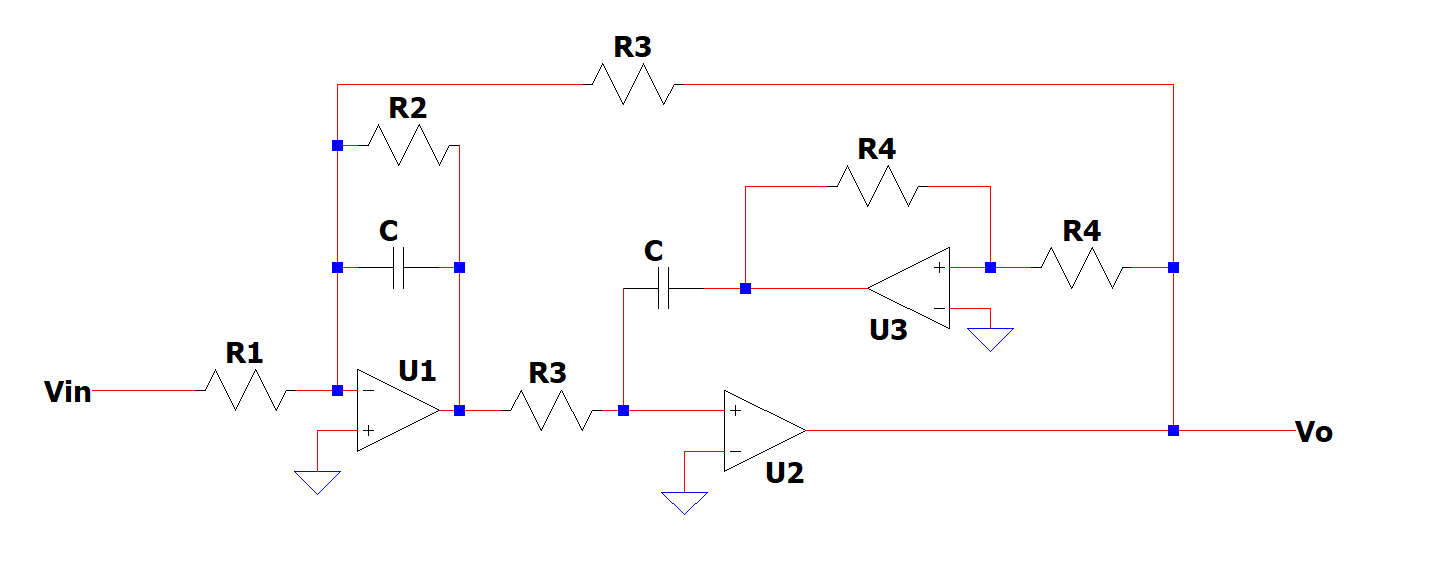

1. Hallar la transferencia T=Vo/Vi en función de ωo y Q

2. Obtener el valor de los componentes del circuito de forma tal que ωo=1 y Q=3

3. Ajustar el valor de R1 de forma tal que |T(0)|=20dB

### Bonus:

+10 💎 Obtener los valores de la red normalizados en frecuencia e impedancia.

+10 🎓 Calcular las sensibilidades  $S^{ωo}_C, S^Q_{R2} y S^Q_{R3} $

+10 🤯 Recalcular los valores de la red para que cumpla con una transferencia Butterworth.

+10  🎸 Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros quedaría diseñado (Ver ejemplo 4.6 en Schaumann).

+10  ⚽️ Simulación circuital de todos los experimentos.

+10  🍺 Presentación en jupyter notebook


# Desarrollo analítico


In [1]:
from IPython.display import IFrame
IFrame("./TS2.pdf", width=1000, height=1000)

# Simulación de la función transferencia normalizada 

Se simuló la transferencia normalizada en Python para distintas relaciones de R2/R1, a continuacion se muestra el código y los resultados de la simulación.


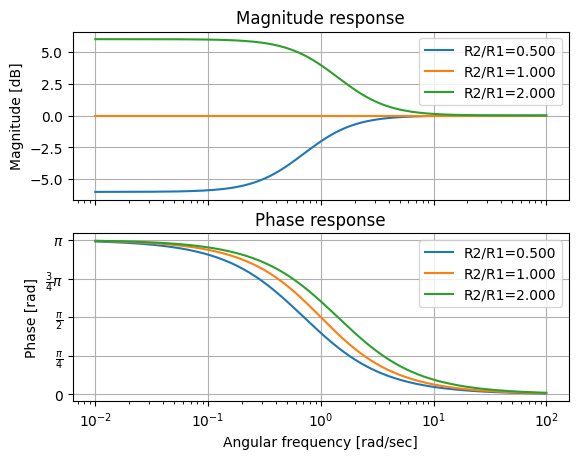

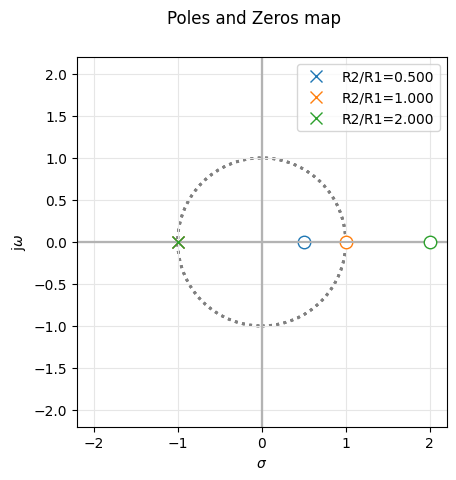

In [1]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

w0 = 1

plt.close('all')

R1 = 1
R2 = [ 0.5, 1, 2]

for qq in range(len(R2)):
    
    my_tf = TransferFunction( [1, -(R2[qq]/R1)*w0], [1, w0] )
    
    bodePlot(my_tf, fig_id=1, filter_description = 'R2/R1={:3.3f}'.format(R2[qq]/R1) )
    
    pzmap(my_tf, fig_id=2, filter_description = 'R2/R1={:3.3f}'.format(R2[qq]/R1)) #S plane pole/zero plot

# Simulación de la transferencia para valores específicos

Se realizó la simulación para R2/R1 = 1, R3 = 1kΩ y C = 1µF y se obtuvieron los siguientes resultados

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

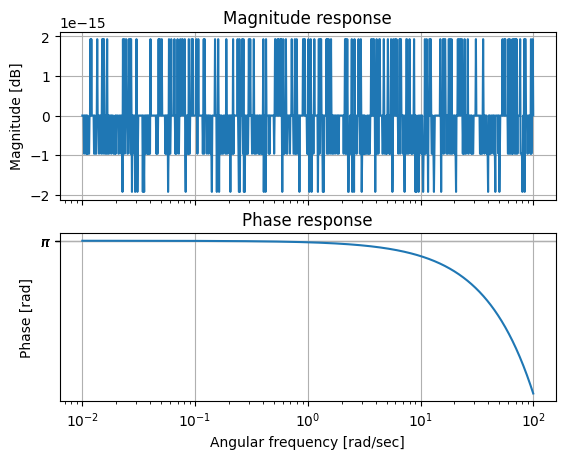

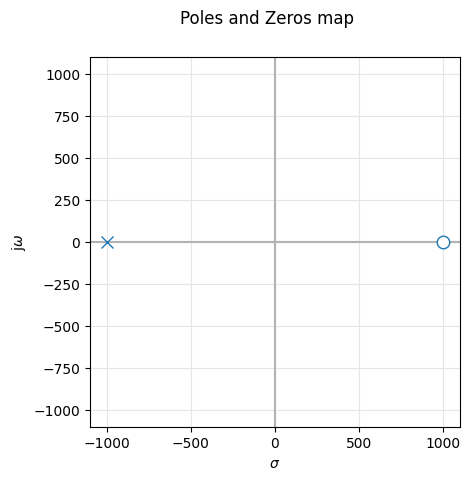

In [3]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

R1 = 1
R2 = 1
R3 = 1000
C = 1e-6

w0 = 1/(R3*C)

plt.close('all')
    
my_tf = TransferFunction( [1, -(R2/R1)*w0], [1, w0] )
    
bodePlot(my_tf, fig_id=1)
    
pzmap(my_tf, fig_id=2) #S plane pole/zero plot
    
    

En el gráfico de magnitud se puede observar que la variación se encuentra entre $-2x10^{-15}$ y $2x10^{-15}$, este leve error se le puede atribuir al redondeo del programa.

# Normalizacion de Red

![Alt text](https://media.discordapp.net/attachments/702533519745876042/1096817968240922704/IMG_9572.jpg?width%3D894%26height%3D671)

# Conclusión

Utilizando los gráficos de módulo y fase obtenidos en la simulación anterior se puede ver que la mayor utilidad del circuito reside en el cambio de fase ya que la magnitud de la señal será la misma. Es decir, que el circuito se puede usar como un inversor de fase.